In [154]:
from _3D_CT_Preprocess import preprocessScan
from _3D_CT_Preprocess import getScan
from _3D_CT_Preprocess import normalizeScan
from _3D_CT_Preprocess import resizeScan
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import matplotlib.pyplot as plt

In [155]:
Cat = ['Positive','Negative']
Count = [349,397]

<BarContainer object of 2 artists>

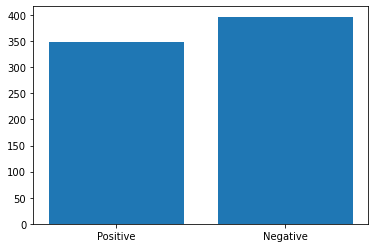

In [156]:
plt.bar(Cat,Count)

# Direct Classification

In [87]:
CovidScan=[]
Label=[]

In [88]:
CovidScan_Path_0 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-0/"
CovidScan_Path_1 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-1/"
CovidScan_Path_2 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-2/"
CovidScan_Path_3 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-3/"
CovidScan_Path_4 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-4/"
CovidScan_List_0 = os.listdir(CovidScan_Path_0)
CovidScan_List_1 = os.listdir(CovidScan_Path_1)
CovidScan_List_2 = os.listdir(CovidScan_Path_2)
CovidScan_List_3 = os.listdir(CovidScan_Path_3)
CovidScan_List_4 = os.listdir(CovidScan_Path_4)

In [ ]:
# Negative CT
for Scan_ in CovidScan_List_0:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    scan = preprocessScan(CovidScan_Path_0+Scan_,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(0)


In [90]:
len(CovidScan),len(Label)

(254, 254)

In [ ]:
# Positive CT
i = 0
for Scan_ in CovidScan_List_1:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    scan = preprocessScan(CovidScan_Path_1+Scan_,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(1)
    i=i+1
    
    if i == 103:
        break;

In [ ]:
i=0
for Scan_ in CovidScan_List_2:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    scan = preprocessScan(CovidScan_Path_2+Scan_,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(1)
    i= i+1
    
    if i == 104:
        break;

In [ ]:

for Scan_ in CovidScan_List_3:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    scan = preprocessScan(CovidScan_Path_3+Scan_,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(1)
    i=i+1


In [94]:
len(CovidScan),len(Label)

(506, 506)

In [95]:
for Scan_ in CovidScan_List_4:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    scan = preprocessScan(CovidScan_Path_4+Scan_,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(1)

After Resize(128, 128, 64, 1)
After Resize(128, 128, 64, 1)


In [96]:
len(CovidScan),len(Label)

(508, 508)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(CovidScan), np.array(Label),test_size = 0.2,shuffle=True)

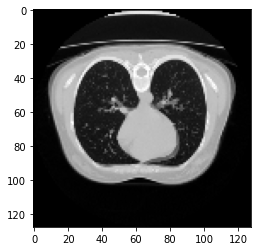

In [98]:
plt.imshow(X_train[309][:,:,28],cmap='gray')

In [99]:
np.save('X_train_3D_Direct_BinaryClass',X_train)
np.save('y_train_3D_Direct_BinaryClass',y_train)
np.save('X_test_3D_Direct_BinaryClass',X_test)
np.save('y_test_3D_Direct_BinaryClass',y_test)

In [85]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((406, 128, 128, 64), (406,), (102, 128, 128, 64), (102,))

# Segmentation Lung to do classifiction

In [103]:
CovidScan=[]
Label=[]

In [104]:
CovidScan_Path_0 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-0/"
CovidScan_Path_1 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-1/"
CovidScan_Path_2 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-2/"
CovidScan_Path_3 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-3/"
CovidScan_Path_4 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-4/"
CovidScan_List_0 = os.listdir(CovidScan_Path_0)
CovidScan_List_1 = os.listdir(CovidScan_Path_1)
CovidScan_List_2 = os.listdir(CovidScan_Path_2)
CovidScan_List_3 = os.listdir(CovidScan_Path_3)
CovidScan_List_4 = os.listdir(CovidScan_Path_4)

In [105]:
len(CovidScan_List_0)

255

In [ ]:
# Negative CT
for Scan_ in CovidScan_List_0:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    # Add the lung segmented CT to area
    scan = getScan(CovidScan_Path_0+Scan_)
    lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    scan[~lungMask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(0)


In [107]:
len(CovidScan),len(Label)

(254, 254)

In [ ]:
# Positive CT
i = 0
for Scan_ in CovidScan_List_1:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    # Add the lung segmented CT to area
    scan = getScan(CovidScan_Path_1+Scan_)
    lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    scan[~lungMask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(1)
    
    i = i+1
    if i==103:
        break;
        

In [109]:
len(CovidScan),len(Label)

(357, 357)

In [ ]:
i=0
for Scan_ in CovidScan_List_2:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    # Add the lung segmented CT to area
    scan = getScan(CovidScan_Path_2+Scan_)
    lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    scan[~lungMask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(1)
    
    i = i+1
    if i==103:
        break;

In [111]:
len(CovidScan),len(Label)

(460, 460)

In [ ]:

for Scan_ in CovidScan_List_3:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    # Add the lung segmented CT to area
    scan = getScan(CovidScan_Path_3+Scan_)
    lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    scan[~lungMask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(1)
    
 

In [113]:
len(CovidScan),len(Label)

(505, 505)

In [114]:
for Scan_ in CovidScan_List_4:
    
    if(Scan_ == ".DS_Store"):
        continue;
    
    # Add the lung segmented CT to area
    scan = getScan(CovidScan_Path_4+Scan_)
    lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    scan[~lungMask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(1)

Before Resize(42, 512, 512)
After Resize(128, 128, 64, 1)
Before Resize(36, 512, 512)
After Resize(128, 128, 64, 1)


In [116]:
len(CovidScan),len(Label)

(507, 507)

In [17]:
CovidScan[0].shape

(128, 128, 64, 1)

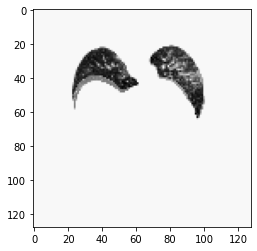

In [129]:
plt.imshow(CovidScan[-1][:,:,28],cmap='gray')

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(CovidScan), np.array(Label), 
                                                    test_size = 0.2, random_state = 0,shuffle=True)

In [125]:
np.save('X_train_3D_LungSeg_BinaryClass',X_train)
np.save('y_train_3D_LungSeg_BinaryClass',y_train)
np.save('X_test_3D_LungSeg_BinaryClass',X_test)
np.save('y_test_3D_LungSeg_BinaryClass',y_test)